<a href="https://colab.research.google.com/github/Sk3204/Deep-Learning-Core/blob/main/Neural%20Networks%20and%20Deep%20Learning/2ndweek_non_vercorized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NEURAL NETWORK

##Introduction

 **Neural Network**:
  * Interconnected nodes that compute together to give output based on input
  * Tries to mimic human brain
  * Structure:Built in layers(Input-> Hidden -> Output)
  * Node(Neuron): Does specific calculation(Weighted Sum)
  * Weights:Tells the importance of each connection
  * Bias:Constant value added to node to fit pattern
  * Activation Function(Mathematical Filter/Function):Transforms the node's raw calculation into a refined output value to easily represent complex data patterns
  * Training:Process of automatically adjusting Weights and Biases to reduce errors.
  





**Neural Network Types:**
* **ANN**:feedforward NN,simplest form,information moves in only 1 direction(input to output)
  * Best for:Tabular data,simple regression and classification task.
* **CNN**:kings of computer vision,use "filters" to scan images for patterns
  * Best for image recognition,medical imaging
* **RNN**:designed for data that comes in a sequence where order matters.contains memory
  * Best for speech recognition,and NLP
* **GAN**:GAN combination of 2 network.Generator tries to create fake data Discriminator tries to catch the fake data.
  * Best for:Creating "deepfakes","generating art
* **Transformers**:uses Self-Attention mechanism to look at entire sentence at once understanding the context of every word simulataneously
  * Best for LLMs,translation,complex text generation.

**Data types:**
* Structured Data:Tables including features and outputs
* Unstructured Data:Audio,Image,Text

**Why Deep learning boom at present?**
* Abundant labelled data due to digitalization and improved devices(mobile,camera etc)
* Bigger neural network introduced (more hidden layers,more parameters)
* Hardware upgrade and innovation(GPU,TPU)
* Algorithm upgrade and innovation:Various algoritm innovation has helped computation and even small thing like switching from sigmoid to relu function has also impacted and made computation faster.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import copy
import math

In [2]:
dataset = load_breast_cancer()


In [3]:
# Generating dummy data (100 samples, 2 features)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [4]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##**Binary Classification:**
* Classification of object as binary digit
* Eg:1(cat) vs 0(non cat)


In [5]:
#all the rows but only second column i.e probability of class 1
probs = model.predict_proba(X_test)[:, 1]
#if probs >0.5 it becomes true and astype makes true=1
predictions = (probs > 0.5).astype(int)

In [6]:
print(f"Probabilities (first 5): {probs[:5].round(3)}")
print(f"Binary Classified Output (first 5): {predictions[:5]}")

Probabilities (first 5): [0.992 0.032 0.997 0.81  0.964]
Binary Classified Output (first 5): [1 0 1 1 1]


storing image in creates 3 matrix of blue red green matrix of same dimension containing the pixel intensity.

This three matrix are placed one after another in a column matrix as an input in.

##**Notation**

Single training example:(x,y)
* $$x \in \mathbb{R}^{n_x}$$$$y \in \{0, 1\}$$

m training examples:
* $$\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(m)}, y^{(m)})\}$$



X.shape=(nx,m)

Y.shape=(1,m)

In [7]:
#Demo Initializing/Self Created
nx = 3  # features (e.g., age, weight, member_status)
m = 2   # training examples

w=np.zeros(nx)                    #Shape:(nx,1)
b=0                               #Shape:(1,)
X = np.array([                    #Shape:(nx,m)
    [10, 20],  # Feature 1 (e.g., Age)
    [ 5,  8],  # Feature 2 (e.g., Weight)
    [ 1,  0]   # Feature 3 (e.g., Member_Status)
])
Y = np.array([[1, 0]])            #Shape:(1,m)


In [8]:
#Real dataset
X = dataset.data.T               #(m,nx) transposed->(nx,m)
Y = dataset.target.reshape(1, -1)# (m,1)-> (1,m)

nx, m = X.shape       #features and no of examples
w = np.random.randn(nx, 1) * 0.01 #weights #Shape:(nx,1)
b = 0                 #biases #Shape:(1,)
y_hat=np.zeros((1,m)) #probability container
print(f"Dataset Loaded: Breast Cancer Wisconsin")
print(f"Features (nx): {nx}")
print(f"Examples (m): {m}")
print(f"X shape: {X.shape}")

Dataset Loaded: Breast Cancer Wisconsin
Features (nx): 30
Examples (m): 569
X shape: (30, 569)


## Logistic Regression:

Computation: $z = w^T X + b$

$w^T$ shape $(1, n_x);  $$X$ shape $(n_x, m)$

Activation function (Sigmoid): $a = \sigma(z)$

Sigmoid:$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Domain of $z$: $(-\infty, \infty)$ — Any real number.

Range of $a$ (Activation): $(0, 1)$ — Always stays between 0 and 1.

$$a = P(y=1 | x)$$

1=100% safe   
0=100% unsafe


If $z$ is a large positive number, $\sigma(z) \approx 1$.

If $z$ is a large negative number, $\sigma(z) \approx 0$.

If $z = 0$, then $\sigma(z) = 0.5$.

In [9]:
#Activation function
def sigmoid(z):
    # Brings z value in the range betn 0 and 1
    return 1 / (1 + np.exp(-z))

In [10]:
def forward_prop(X,w,b,m,nx):
  y_hat = np.zeros((1, m))
  for i in range(m):
    # Calculating linear sum for this specific example
    z_i = 0
    for j in range(nx):
        # Multiplying each feature by its weight
        z_i += w[j,0] * X[j, i]
    z_i += b
    # calculating probability
    y_hat[0,i] = sigmoid(z_i)
  return y_hat

In [11]:
print(f"Shape of output y_hat: {y_hat.shape}")
print(f"First 5 probabilities: {y_hat[0, :5]}")

Shape of output y_hat: (1, 569)
First 5 probabilities: [0. 0. 0. 0. 0.]


In [12]:
print("'High Risk / Malignant' Patient (Prob < 0.5) ---")
count = 0
for i in range(m):
    # y_hat[0, i] :probability for ith patient
    if y_hat[0, i] < 0.9:
        # print(f"Patient {i}: Probability = {y_hat[0, i]:.4f}")
        count += 1

if count == 0:
    print("No patients found with probability less than 0.5 with current weights.")
else:
    print(f"\nTotal high-risk patients found: {count} out of {m}")

'High Risk / Malignant' Patient (Prob < 0.5) ---

Total high-risk patients found: 569 out of 569


**Analysis**

Here we are just multipying random weight values to the input datas we have it is like guessing in the exam hall without knowing answers at all.So it is nonconsistent at all.

**Solution**

* So we have to show teach it the correct answer i.e train the model
* So steps of that is:
  * Show the output (Y)
  * Compare the current probability prediction with the Y
  * Introduce error so that we know how much it differ
  * Try to minimize that error so that the accuracy is increased and this prediction is reliable and consistent


##Logistic Regression cost function

It is the error that or the variation that is seen between predcted value and actual value .

The goal of the model is to change the weights and biases to reduce the cost function.

$$J = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(a^{(i)}) + (1-y^{(i)}) \log(1-a^{(i)})]$$

In [13]:
def compute_cost(y_hat,Y,m):
  epsilon = 1e-15
  total_cost = 0
  for i in range(m):
    a_i = y_hat[0, i]#prediction
    y_i = Y[0, i]#label

    #Since log(0) is undefined (-inf), we clip a_i to be slightly above 0 and below 1
    a_i = np.clip(a_i, epsilon, 1 - epsilon)

    loss_i = -(y_i * np.log(a_i) + (1 - y_i) * np.log(1 - a_i))

    # Summation
    total_cost += loss_i

  # Average cost
  J = total_cost / m
  return J

**Analysis:**

As we see the Cost is very high so now we have to calcule the difference and minimize the cost by changing the

## Gradient Descent

It is the technique to minimize the cost by taking small steps towards towards the minimum by finding the parital derivative.

Partial derivative tells us the slope. Moving against the slope (subtracting the gradient) is what leads us "downhill" to the minimum cost.


gradient descent is described as:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \ \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.



So in code
$$w = w - \alpha \cdot dw$$$$b = b - \alpha \cdot db$$

$\alpha$ (Alpha): Learning rate,controls how big the step is.

$dw$ and $db$:gradients;partial derivative of cost function with respect to w and b.


**The Gradient Descent Loop:**
* Forward Propagation:Calcualte Y_hat and the Cost
* Backpropagation:Calculate dw and db
* Change w and b slightly
* Repeat

$$dw_j = \frac{1}{m} \sum_{i=1}^m (a^{(i)} - y^{(i)}) \cdot x_j^{(i)}$$

$$db = \frac{1}{m} \sum_{i=1}^m (a^{(i)} - y^{(i)})$$

In [14]:
iterations = 2000
learning_rate = 0.01
costs = []

In [15]:
def back_prop(X, A, Y, nx, m):
    dw = np.zeros((nx, 1))
    db = 0.0
    for i in range(m):
        dz_i = A[0, i] - Y[0, i]
        for j in range(nx):
            dw[j, 0] += X[j, i] * dz_i
        db += dz_i
    return dw / m, db / m

In [16]:
def model(X,Y,w_in,b_in,iterations,learning_rate):
  w= copy.deepcopy(w_in)
  b=b_in
  nx,m=X.shape
  cost_history = []

  for epoch in range(iterations):
    total_cost = 0.0
    # 1. Forward Propagation
    y_hat = forward_prop(X, w, b, m, nx)

     # 2. Cost Finding
    cost = compute_cost(y_hat, Y, m)
    cost_history.append(cost)

    # 3. Backward Propagation
    dw, db = back_prop(X, y_hat, Y, nx, m)

    # 4. UPDATE PARAMETERS(Gradient descent part)
    for j in range(nx):
        w[j, 0] = w[j, 0] - learning_rate * dw[j, 0]
    b = b - learning_rate * db

    #printing the cost in each 100 epoch intervatal
    if epoch % 100 == 0:
        print(f"Iteration {epoch}: Cost {cost:.6f}")
  return w,b,cost_history

Iteration 0: Cost 4.373288


/tmp/ipython-input-2487351055.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration 100: Cost 21.616843
Iteration 200: Cost 4.472193
Iteration 300: Cost 5.130826
Iteration 400: Cost 3.498610
Iteration 500: Cost 3.585824
Iteration 600: Cost 3.440438
Iteration 700: Cost 3.566364
Iteration 800: Cost 17.728948
Iteration 900: Cost 3.482909
Iteration 1000: Cost 3.585245
Iteration 1100: Cost 3.052479
Iteration 1200: Cost 3.090333
Iteration 1300: Cost 3.436212
Iteration 1400: Cost 2.932063
Iteration 1500: Cost 2.942834
Iteration 1600: Cost 2.968758
Iteration 1700: Cost 3.007278
Iteration 1800: Cost 3.244582
Iteration 1900: Cost 3.440737
------------------------------
Final Weights:
[[ 3.71163325e+00]
 [ 3.29786456e+00]
 [ 2.07428634e+01]
 [ 7.67187313e+00]
 [ 3.09693867e-02]
 [-4.35622090e-02]
 [-8.96088465e-02]
 [-5.84607501e-02]
 [ 5.74180818e-02]
 [ 1.38326228e-02]
 [ 2.33832128e-03]
 [ 2.22376869e-01]
 [-3.04329129e-01]
 [-1.05572829e+01]
 [-3.19543036e-03]
 [-1.79860380e-02]
 [-2.32823178e-02]
 [-1.09931254e-02]
 [ 3.81876801e-03]
 [ 1.58163408e-02]
 [ 3.965162

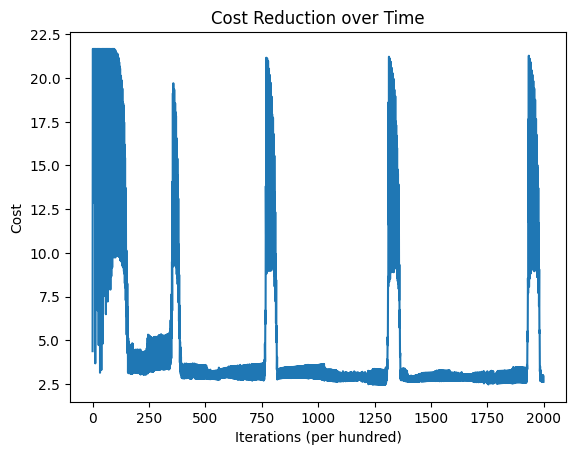

In [17]:
weights,bias,J_history=model(X,Y,w,b,iterations,learning_rate)
print("-" * 30)
print(f"Final Weights:\n{weights}")
print(f"Final Bias: {bias:.6f}")

# 4. Visualization (The most effective way to show it works)
import matplotlib.pyplot as plt

plt.plot(J_history)
plt.title("Cost Reduction over Time")
plt.xlabel("Iterations (per hundred)")
plt.ylabel("Cost")
plt.show()

**Analysis**:

For running above code we need to do backward propagation i.e we need to do derivative and find db and dw

Derivatives

For various functions and do backward propagation derivative is necessary.

In [18]:
def back_prop(X, y_hat, Y, nx, m):
    # Initialize gradients as zero
    dw = [[0.0] for _ in range(nx)]
    db = 0.0

    for i in range(m):  # For every training example
        # Local derivative: dLoss/dz = (y_hat - y)
        dz = y_hat[i] - Y[0, i]

        for j in range(nx):  # For every feature
            # Chain Rule: dL/dw_j = dz * dz/dw_j = dz * x_j
            dw[j][0] += dz * X[j, i]

        # Chain Rule: dL/db = dz * dz/db = dz * 1
        db += dz

    # Average the gradients over all examples
    for j in range(nx):
        dw[j][0] /= m
    db /= m

    return dw, db

## Logistic Regression Gradient Descent



Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
    


### Logistic Regression Model
The prediction is calculated as:


The output is passed through the sigmoid function:
$$f_{\mathbf{w},b}(x) = g(z)$$

Where $g(z)$ is defined as:
$$g(z) = \frac{1}{1+e^{-z}}$$

In [19]:
def compute_gradient_logistic(X, y, w, b):
    nx, m = X.shape
    dj_dw = np.zeros((nx, 1))
    dj_db = 0.

    for i in range(m):
        # non-vectorized weighted sum (z = w1x1 + w2x2... + b)
        z_i = 0
        for j in range(nx):
            z_i += w[j, 0] * X[j, i]
        z_i += b

        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[0, i] # Assuming y is (1, m)

        for j in range(nx):
            dj_dw[j, 0] += err_i * X[j, i]
        dj_db += err_i

    return dj_db / m, dj_dw / m

In [20]:
# Call your function
dj_db, dj_dw = compute_gradient_logistic(X, Y, w, b)

# Output Results
print(f"Computed dj_db (scalar): {dj_db}")
print(f"Computed dj_dw shape: {dj_dw.shape}")
print(f"Computed dj_dw values:\n{dj_dw}")

Computed dj_db (scalar): 0.35740048458791246
Computed dj_dw shape: (30, 1)
Computed dj_dw values:
[[6.34965865e+00]
 [7.78187999e+00]
 [4.19796042e+01]
 [3.59473015e+02]
 [3.68802245e-02]
 [5.28376128e-02]
 [5.91978484e-02]
 [3.24698025e-02]
 [6.91169096e-02]
 [2.23248431e-02]
 [2.22615736e-01]
 [4.30162383e-01]
 [1.58081665e+00]
 [2.68030235e+01]
 [2.38483208e-03]
 [1.16489413e-02]
 [1.51131648e-02]
 [5.46065197e-03]
 [7.25982603e-03]
 [1.44261727e-03]
 [7.70222434e+00]
 [1.05757072e+01]
 [5.15572810e+01]
 [5.23836982e+02]
 [5.19620069e-02]
 [1.36952569e-01]
 [1.65517935e-01]
 [6.69883876e-02]
 [1.16315856e-01]
 [3.28046837e-02]]


Gradient Descent on m examples.

In [21]:

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    nx,m=X.shape

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        y_hat = forward_prop(X, w, b, m, nx)

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  compute_cost(y_hat, y, m)
            J_history.append( compute_cost(y_hat,y,m) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

In [22]:
dataset = load_breast_cancer()
#Real dataset
X = dataset.data.T               #(m,nx) transposed->(nx,m)
Y = dataset.target.reshape(1, -1)# (m,1)-> (1,m)

nx, m = X.shape       #features and no of examples
w = np.random.randn(nx, 1) * 0.01 #weights #Shape:(nx,1)
b = 0                 #biases #Shape:(1,)
y_hat=np.zeros((1,m)) #probability container
print(f"Dataset: Breast Cancer | Features: {nx} | Examples: {m}")
print(f"X shape: {X.shape}, w shape: {w.shape}")

# 4. Hyperparameters
iterations = 1000
alpha = 0.1

# 5. Run Gradient Descent (Use X and Y, not X_train/y_train)
w_final, b_final, J_history = gradient_descent(X, Y, w, b, alpha, iterations)

# 6. Show Results
print("-" * 30)
print(f"Final Weights (First 3):\n{w_final[:3]}")
print(f"Final Bias: {b_final:.6f}")

Dataset: Breast Cancer | Features: 30 | Examples: 569
X shape: (30, 569), w shape: (30, 1)
Iteration    0: Cost 12.868875413666604   


/tmp/ipython-input-2487351055.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration  100: Cost 9.894465530605725   
Iteration  200: Cost 3.156494126613079   
Iteration  300: Cost 3.3386177173796603   
Iteration  400: Cost 2.913680940740224   
Iteration  500: Cost 2.792284887312983   
Iteration  600: Cost 2.8529871298302782   
Iteration  700: Cost 2.740643453845319   
Iteration  800: Cost 5.570516087524822   
Iteration  900: Cost 2.8529885351035738   
------------------------------
Final Weights (First 3):
[[ 30.16798068]
 [ 41.6725357 ]
 [175.79175518]]
Final Bias: 3.960319
